## <code>compute()</code> Performance Properties and Skew

We're going to build a somewhat interesting workload and then run it a couple of different ways.  Let's start by loading the NYC flight data.

In [1]:
import dask.dataframe as dd
df = dd.read_csv('../../input/dask-nyc-flights/*.csv',
                 parse_dates={'Date': [0, 1, 2]},
                 dtype={'TailNum': str,
                        'CRSElapsedTime': float,
                        'Cancelled': bool})
df.head()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990-01-01,1,1621.0,1540,1747.0,1701,US,33,NaN,86.0,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,False,0
1,1990-01-02,2,1547.0,1540,1700.0,1701,US,33,NaN,73.0,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,False,0
2,1990-01-03,3,1546.0,1540,1710.0,1701,US,33,NaN,84.0,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,False,0
3,1990-01-04,4,1542.0,1540,1710.0,1701,US,33,NaN,88.0,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,False,0
4,1990-01-05,5,1549.0,1540,1706.0,1701,US,33,NaN,77.0,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,False,0


Let's build a set of queries around the performance of particular planes, identified by tail number.  The pattern will be to <code>groupby('TailNum') and then compute statistics.

__Query__: What is the average departure delay 'DepDelay' for each plane?

In [2]:
//TODO

TailNum
EI-BWD    11.213501
EI-CAL    23.846154
EI-CAM    26.611511
EI-CIW    12.918182
N050AA     9.180180
            ...    
N976TW    -2.294118
N978TW     0.000000
N979TW     5.250000
N980TW     3.428571
N982TW    14.000000
Name: DepDelay, Length: 3712, dtype: float64

Interesting, some planes were early, lets plot the distribution.

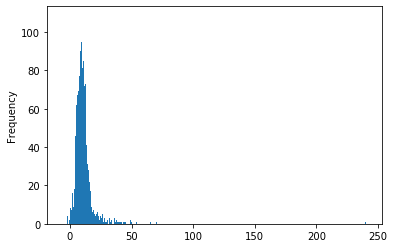

In [3]:
%matplotlib inline
//TODO

OK, we have very few chronically bad planes.  Let's find those that are more than 30 minutes late on average.

In [4]:
//TODO

['N101UW' 'N102UW' 'N104UW' 'N106UW' 'N128AW' 'N133JC' 'N133TW' 'N134TW'
 'N14249' 'N144JC' 'N147US' 'N151AW' 'N151UA' 'N152UA' 'N153US' 'N154AA'
 'N154AW' 'N155US' 'N156AW' 'N158AW' 'N161US' 'N168AW' 'N169AW' 'N17010'
 'N17011' 'N1738D' 'N1739D' 'N174AW' 'N174GM' 'N174UA' 'N175UA' 'N17789'
 'N1854U' 'N195UA' 'N199UA' 'N224DA' 'N224NW' 'N225NW' 'N235NW' 'N303TW'
 'N304AW' 'N305AW' 'N305TW' 'N307TW' 'N322AW' 'N328AW' 'N33021' 'N3310L'
 'N331AW' 'N375DA' 'N376DL' 'N379DL' 'N382DA' 'N53110' 'N53116' 'N534TW'
 'N6700' 'N701UW' 'N706UW' 'N708UW' 'N713DA' 'N713UW' 'N716DA' 'N719DA'
 'N724DA' 'N727UW' 'N733DS' 'N735D' 'N737D' 'N760DH' 'N78019' 'N787DL'
 'N789DL' 'N802DE' 'N805DE' 'N817AA' 'N8911E' 'N93104' 'N93107' 'N93108'
 'N93109' 'N93119' 'N96S' 'N971Z' 'N976UA' 'N993UA' 'NEIDLA' 'UNKNOW']


OK, this is a hard query.
Build a dataframe that is a subset all the data associated with the late planes.

In [5]:
//TODO

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
8,1995-01-09,1,NaN,1950,NaN,2337,CO,401,UNKNOW,NaN,...,42.0,NaN,NaN,EWR,PHX,2133.0,8.0,33.0,True,0
39,1995-01-18,3,NaN,1640,NaN,2002,CO,446,UNKNOW,NaN,...,56.0,NaN,NaN,EWR,PHX,2133.0,6.0,20.0,True,0
248,1995-01-11,3,NaN,1815,NaN,2202,TW,731,UNKNOW,NaN,...,124.0,NaN,NaN,JFK,PHX,2153.0,10.0,34.0,True,0
276,1995-01-09,1,NaN,1900,NaN,2042,CO,633,UNKNOW,NaN,...,134.0,NaN,NaN,EWR,PIT,319.0,5.0,18.0,True,0
285,1995-01-09,1,NaN,1500,NaN,1634,CO,663,UNKNOW,NaN,...,154.0,NaN,NaN,EWR,PIT,319.0,4.0,11.0,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268926,1999-12-20,1,NaN,1846,NaN,2103,UA,1609,UNKNOW,NaN,...,NaN,NaN,NaN,EWR,DEN,1605.0,0.0,0.0,True,0
269031,1999-12-16,4,NaN,615,NaN,829,UA,401,UNKNOW,NaN,...,NaN,NaN,NaN,LGA,DEN,1619.0,0.0,0.0,True,0
269093,1999-12-14,2,NaN,1650,NaN,1906,UA,785,UNKNOW,NaN,...,NaN,NaN,NaN,LGA,DEN,1619.0,0.0,0.0,True,0
269153,1999-12-17,5,NaN,1400,NaN,1613,UA,1691,UNKNOW,NaN,...,NaN,NaN,NaN,LGA,DEN,1619.0,0.0,0.0,True,0


Double check that the planes indexes match.

In [6]:
//TODO

['N101UW' 'N102UW' 'N104UW' 'N106UW' 'N128AW' 'N133JC' 'N133TW' 'N134TW'
 'N14249' 'N144JC' 'N147US' 'N151AW' 'N151UA' 'N152UA' 'N153US' 'N154AA'
 'N154AW' 'N155US' 'N156AW' 'N158AW' 'N161US' 'N168AW' 'N169AW' 'N17010'
 'N17011' 'N1738D' 'N1739D' 'N174AW' 'N174GM' 'N174UA' 'N175UA' 'N17789'
 'N1854U' 'N195UA' 'N199UA' 'N224DA' 'N224NW' 'N225NW' 'N235NW' 'N303TW'
 'N304AW' 'N305AW' 'N305TW' 'N307TW' 'N322AW' 'N328AW' 'N33021' 'N3310L'
 'N331AW' 'N375DA' 'N376DL' 'N379DL' 'N382DA' 'N53110' 'N53116' 'N534TW'
 'N6700' 'N701UW' 'N706UW' 'N708UW' 'N713DA' 'N713UW' 'N716DA' 'N719DA'
 'N724DA' 'N727UW' 'N733DS' 'N735D' 'N737D' 'N760DH' 'N78019' 'N787DL'
 'N789DL' 'N802DE' 'N805DE' 'N817AA' 'N8911E' 'N93104' 'N93107' 'N93108'
 'N93109' 'N93119' 'N96S' 'N971Z' 'N976UA' 'N993UA' 'NEIDLA' 'UNKNOW']


Now, let's get a sense of what airports these planes fly out of.  Let's find out the total delay at these airports for these planes, the average delay by airport and the total number of flights.

In [7]:
//TODO

Origin
EWR    16982.0
JFK    61684.0
LGA    27789.0
Name: DepDelay, dtype: float64

In [9]:
//TODO

Origin
EWR    18723
JFK     4564
LGA    13056
Name: Origin, dtype: int64

I don't know that these statistics all make sense, but that's to debug.

## Deferred computing

We are going to show the value of deferred computation by timing the following
queries in two different ways:

<code>
df1 = df.groupby(['Origin','TailNum']).DepDelay.mean()
df2 = df.groupby(['TailNum','Origin']).DepDelay.mean()
df3 = df.groupby(['Origin','TailNum']).DepDelay.max()
df4 = df.groupby(['TailNum','Origin']).DepDelay.max()
</code>

 1. In one cell, add these lines and then call `compute()` on every step
 2. In the next cell, add the lines and only call compute at the end?

In [2]:
%%time

import dask.dataframe as dd
df = dd.read_csv('../input/dask-nyc-flights/*.csv',
                 parse_dates={'Date': [0, 1, 2]},
                 dtype={'TailNum': str,
                        'CRSElapsedTime': float,
                        'Cancelled': bool})

df1 = df.groupby(['Origin','TailNum']).DepDelay.mean().compute()
df2 = df.groupby(['TailNum','Origin']).DepDelay.mean().compute()
df3 = df.groupby(['Origin','TailNum']).DepDelay.max().compute()
df4 = df.groupby(['TailNum','Origin']).DepDelay.max().compute()

CPU times: user 31.9 s, sys: 7.67 s, total: 39.6 s
Wall time: 25.4 s


In [4]:
%%time

import dask.dataframe as dd
df = dd.read_csv('../input/dask-nyc-flights/*.csv',
                 parse_dates={'Date': [0, 1, 2]},
                 dtype={'TailNum': str,
                        'CRSElapsedTime': float,
                        'Cancelled': bool})

df1 = df.groupby(['Origin','TailNum']).DepDelay.mean()
df2 = df.groupby(['TailNum','Origin']).DepDelay.mean()
df3 = df.groupby(['Origin','TailNum']).DepDelay.max()
df4 = df.groupby(['TailNum','Origin']).DepDelay.max()

dd.compute(df1, df2, df3, df4)

CPU times: user 9.7 s, sys: 1.63 s, total: 11.3 s
Wall time: 6.43 s


(Origin  TailNum
 EWR     EI-BWD      9.355140
         EI-CIW     16.283019
         N050AA      8.309677
         N051AA      5.949275
         N052AA     21.845070
                      ...    
 LGA     N993UA     55.000000
         N994UA     -3.250000
         N995UA     14.600000
         N996UA      9.333333
         N998UA      1.750000
 Name: DepDelay, Length: 8861, dtype: float64,
 TailNum  Origin
 EI-BWD   EWR        9.355140
          JFK       11.575758
          LGA       11.626866
 EI-CAL   JFK       23.846154
 EI-CAM   JFK       26.611511
                      ...    
 N993UA   LGA       55.000000
 N994UA   LGA       -3.250000
 N995UA   LGA       14.600000
 N996UA   LGA        9.333333
 N998UA   LGA        1.750000
 Name: DepDelay, Length: 8861, dtype: float64,
 Origin  TailNum
 EWR     EI-BWD     177.0
         EI-CIW     331.0
         N050AA     248.0
         N051AA     140.0
         N052AA     996.0
                    ...  
 LGA     N993UA     227.0
         N994

### Skew

Let's look at the effect that having skewed inputs has on performance.  I have rewritten then 10 csv files into 3 different files that have size 5 years, 3 years, and 2 years of data.

In [ ]:
%%time

import dask.dataframe as dd
df = dd.read_csv('../input/dask-nyc-flights/skewed/*.csv',
                 parse_dates={'Date': [0, 1, 2]},
                 dtype={'TailNum': str,
                        'CRSElapsedTime': float,
                        'Cancelled': bool})

df1 = df.groupby(['Origin','TailNum']).DepDelay.mean()
df2 = df.groupby(['TailNum','Origin']).DepDelay.mean()
df3 = df.groupby(['Origin','TailNum']).DepDelay.max()
df4 = df.groupby(['TailNum','Origin']).DepDelay.max()

dd.compute(df1, df2, df3, df4)

That's the exact same data, but with a different partitioning. 

## Outcomes
* Wrestled with dataframes syntax and concepts (in project 3 parrt 2).  Good for you.
* Witnessed the benefit of deferred computation.
* Demonstrated skew as a factor against parallelism.